In [73]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error , accuracy_score , r2_score

In [19]:
df = pd.read_csv("C:/Users/Gayathri/Downloads/heartDisease.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.shape

(303, 14)

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None


In [48]:
# checking the correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


no null values are present

In [25]:
df.duplicated().sum()

1

In [26]:
df.drop_duplicates(inplace=True)

duplicate values have been handled

In [27]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [52]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

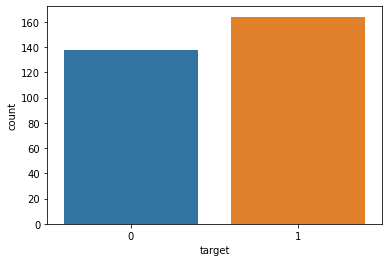

In [56]:
sns.countplot(x='target', data=df)

<AxesSubplot:>

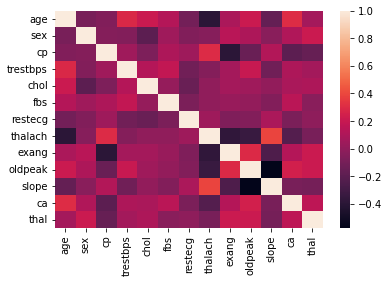

In [55]:
sns.heatmap(df.drop(columns='target').corr())

<function matplotlib.pyplot.show(close=None, block=None)>

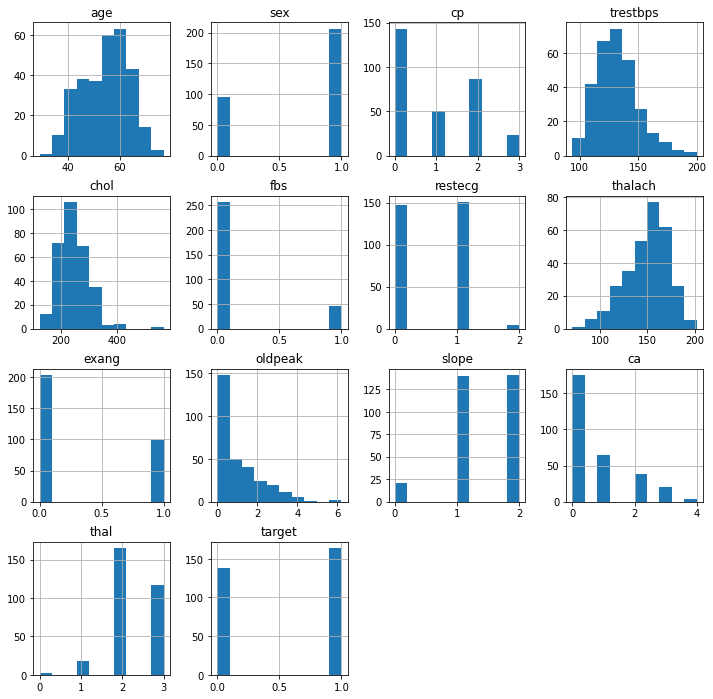

In [53]:
df.hist(figsize =(12, 12))
plt.show

<AxesSubplot:xlabel='age', ylabel='target'>

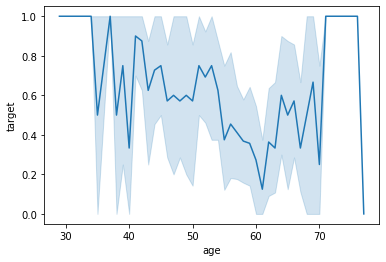

In [57]:
sns.lineplot(data=df,x='age',y='target')

<AxesSubplot:xlabel='target', ylabel='sex'>

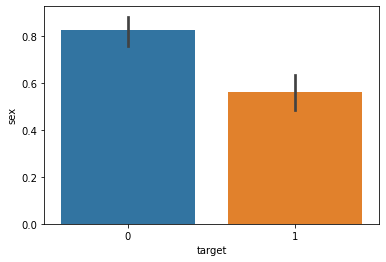

In [59]:
sns.barplot(data=df,x='target',y='sex')

In [65]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)  

In [66]:
# Using standard scaler as a standardization technique.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [67]:
lr = LogisticRegression(random_state=42) 
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test) 

In [69]:
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
print("confusion matrix")
print(lr_conf_matrix)

confusion matrix
[[25  4]
 [ 6 26]]


In [71]:
lr_acc_score = accuracy_score(y_test, lr_pred)
print("Accuracy of kNearestNeighbour:",lr_acc_score*100)
print(classification_report(y_test, lr_pred))

Accuracy of kNearestNeighbour: 83.60655737704919
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [72]:
tp = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and lr_pred[i] == 1])
fp = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and lr_pred[i] == 1])
fn = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and lr_pred[i] == 0])

precision1 = tp / (tp + fp)
recall1 = tp / (tp + fn)
f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)

# Print the results
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_score1)

Precision: 0.8666666666666667
Recall: 0.8125
F1 Score: 0.8387096774193549


### K-NN (K-Nearest Neighbors)

In [75]:
# creating the knn model
knn = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean') 
knn.fit(x_train, y_train)  
knn_pred = knn.predict(x_test) 

In [76]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
print("confusion matrix")
print(knn_conf_matrix)

confusion matrix
[[27  2]
 [ 4 28]]


In [78]:
knn_acc_score = accuracy_score(y_test, knn_pred)
print("Accuracy of K-NearestNeighbor:",knn_acc_score*100)
print(classification_report(y_test, knn_pred)) # output accuracy

Accuracy of K-NearestNeighbor: 90.1639344262295
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [79]:
tp = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and knn_pred[i] == 1])
fp = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and knn_pred[i] == 1])
fn = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and knn_pred[i] == 0])

precision2 = tp / (tp + fp)
recall2 = tp / (tp + fn)
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)

# Print the results
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_score2)

Precision: 0.9333333333333333
Recall: 0.875
F1 Score: 0.9032258064516129


### SVM (Support Vector Machine)

In [80]:
svm = SVC(random_state=1) # get instance of model
svm.fit(x_train, y_train) # Train/Fit model 
svm_pred = svm.predict(x_test) # get y predictions 


In [81]:
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
print("confusion matrix")
print(svm_conf_matrix)

confusion matrix
[[27  2]
 [ 6 26]]


In [82]:
svm_acc_score = accuracy_score(y_test, svm_pred)
print("Accuracy of Support Vector Machine:",svm_acc_score*100)
print(classification_report(y_test, svm_pred)) # output accuracy

Accuracy of Support Vector Machine: 86.88524590163934
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [83]:
tp = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and svm_pred[i] == 1])
fp = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and svm_pred[i] == 1])
fn = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and svm_pred[i] == 0])

precision3 = tp / (tp + fp)
recall3 = tp / (tp + fn)
f1_score3 = 2 * (precision3 * recall3) / (precision3 + recall3)

# Print the results
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f1_score3)

Precision: 0.9285714285714286
Recall: 0.8125
F1 Score: 0.8666666666666666


### Decision Trees

In [84]:
dt = DecisionTreeClassifier(random_state=42) 
dt.fit(x_train, y_train) 
dt_pred = dt.predict(x_test)

In [85]:
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
print("confusion matrix")
print(dt_conf_matrix)

confusion matrix
[[25  4]
 [10 22]]


In [86]:
dt_acc_score = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree:",dt_acc_score*100)
print(classification_report(y_test, dt_pred))

Accuracy of Decision Tree: 77.04918032786885
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [92]:
tp = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and dt_pred[i] == 1])
fp = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and dt_pred[i] == 1])
fn = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and dt_pred[i] == 0])

precision4 = tp / (tp + fp)
recall4 = tp / (tp + fn)
f1_score4 = 2 * (precision4 * recall4) / (precision4 + recall4)

# Print the results
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f1_score4)

Precision: 0.8461538461538461
Recall: 0.6875
F1 Score: 0.7586206896551724


### Random Forest

In [88]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [89]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("confusion matrix")
print(rf_conf_matrix)

confusion matrix
[[25  4]
 [ 4 28]]


In [90]:
rf_acc_score = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest:",rf_acc_score*100)
print(classification_report(y_test, rf_pred))

Accuracy of Random Forest: 86.88524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [93]:
tp = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and rf_pred[i] == 1])
fp = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and rf_pred[i] == 1])
fn = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and rf_pred[i] == 0])

precision5 = tp / (tp + fp)
recall5 = tp / (tp + fn)
f1_score5 = 2 * (precision5 * recall5) / (precision5 + recall5)

# Print the results
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f1_score5)

Precision: 0.875
Recall: 0.875
F1 Score: 0.875


In [99]:
model = pd.DataFrame({'Model': ['Logistic Regression', 'KNN','SVM','Decision Tree', 'Random Forest'], 'Score': [lr_acc_score, knn_acc_score, svm_acc_score, dt_acc_score, rf_acc_score],
                    'Model No.':[1,2,3,4,5],
                     'Precision':[precision1, precision2, precision3, precision4, precision5],
                     'Recall': [recall1, recall2, recall3, recall4, recall5],
                     'F1-Score': [f1_score1, f1_score2, f1_score3, f1_score4, f1_score5]})
models = model.sort_values(by = 'Score', ascending = False)
models = models.set_index('Model No.')
models

,Model,Score,Precision,Recall,F1-Score
Model No.,,,,,
2,KNN,0.901639,0.933333,0.8750,0.903226
3,SVM,0.868852,0.928571,0.8125,0.866667
5,Random Forest,0.868852,0.875000,0.8750,0.875000
1,Logistic Regression,0.836066,0.866667,0.8125,0.838710
4,Decision Tree,0.770492,0.846154,0.6875,0.758621
